# LEAD SCORING CASE STUDY

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data Cleaning and Preparation

In [1]:
# importing libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# basic data check

lead_df.shape

(9240, 37)

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# checking for null values
lead_df.isnull().mean() * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# dropping columns with more than 40% null values
cols=lead_df.columns
for i in cols:
    if((100*(lead_df[i].isnull().mean())) >= 40):
        lead_df.drop(i, 1, inplace = True)

In [8]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [9]:
# checking for duplicates
count = lead_df.duplicated().sum()
count

0

In [10]:
# Since there are no duplicate records, all the values will be unique hence dropping the columns 'Prospect ID' and 'Lead Number'
lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
lead_df.head(20)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,...,No,No,NaN,No,No,NaN,NaN,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,...,No,No,NaN,No,No,NaN,NaN,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,...,No,No,NaN,No,No,NaN,Thane & Outskirts,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,...,No,No,NaN,No,No,NaN,Mumbai,No,No,Email Opened


In [12]:
# checking null values again after dropping columns with >40% null values
lead_df.isnull().mean() * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [13]:
# check value counts for country 
lead_df.Country.value_counts(normalize=True) * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [14]:
# since 95% of the data has country as 'India', we can drop this column
lead_df.drop(['Country'], 1, inplace = True)

In [15]:
# checking value counts for Specialization
lead_df.Specialization.value_counts(normalize=True) * 100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [16]:
# immputing the value 'Not Specified' instead of 'Select' for null values
lead_df.Specialization.fillna('Not Specified',inplace=True)

In [17]:
lead_df['Specialization'] = lead_df['Specialization'].replace('Select', 'Not Specified')

In [18]:
lead_df['How did you hear about X Education'].value_counts(normalize=True) * 100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [19]:
# dropping this column since no option is selected for 71% of the data
lead_df.drop(['How did you hear about X Education'], 1, inplace = True)

In [20]:
lead_df['What is your current occupation'].value_counts(normalize=True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [21]:
# imputing the mode value for 'What is your current occupation' column
mod = lead_df['What is your current occupation'].mode()[0]
lead_df['What is your current occupation'].fillna(mod,inplace=True)

In [22]:
lead_df['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
# since for 99% of the data Better Career Prospects matters, we can drop this column
lead_df.drop(['What matters most to you in choosing a course'], 1, inplace = True)

In [24]:
lead_df.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [25]:
# Replacing null values with 'Not Specified'
lead_df.Tags.fillna('Not Specified',inplace=True)

In [26]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [27]:
lead_df.isnull().mean() * 100

Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About O

In [28]:
# checking Lead Profile column
lead_df['Lead Profile'].value_counts(normalize=True) * 100

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

In [29]:
# Since nothing is specified in Lead Profile column for more than 60% of the data, dropping this column
lead_df.drop(['Lead Profile'], 1, inplace = True)

In [30]:
#checking city column
lead_df.City.value_counts(normalize=True) * 100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [31]:
# Replacing null values with mode value
city_mode = lead_df.Tags.mode()[0]
lead_df.City.fillna(city_mode,inplace=True)

In [32]:
# Replacing Select values with 'Not Specified'
lead_df.City = lead_df.City.replace('Select','Not Specified')

In [33]:
lead_df.isnull().mean() * 100

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [34]:
lead_df.TotalVisits.fillna(lead_df.TotalVisits.median(),inplace=True)

In [35]:
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median(),inplace=True)

In [36]:
lead_df['Last Activity'].value_counts(normalize=True) * 100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [37]:
# Replacing null values with mode value
lastactivity_mode = lead_df['Last Activity'].mode()[0]
lead_df['Last Activity'].fillna(lastactivity_mode,inplace=True)

In [38]:
lead_df.isnull().mean() * 100

Lead Origin                                 0.00000
Lead Source                                 0.38961
Do Not Email                                0.00000
Do Not Call                                 0.00000
Converted                                   0.00000
TotalVisits                                 0.00000
Total Time Spent on Website                 0.00000
Page Views Per Visit                        0.00000
Last Activity                               0.00000
Specialization                              0.00000
What is your current occupation             0.00000
Search                                      0.00000
Magazine                                    0.00000
Newspaper Article                           0.00000
X Education Forums                          0.00000
Newspaper                                   0.00000
Digital Advertisement                       0.00000
Through Recommendations                     0.00000
Receive More Updates About Our Courses      0.00000
Tags        

In [39]:
lead_df['Lead Source'].value_counts(normalize=True) * 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [40]:
# Replacing null values with mode value
leadsource_mode = lead_df['Lead Source'].mode()[0]
lead_df['Lead Source'].fillna(leadsource_mode,inplace=True)

In [41]:
lead_df.isnull().mean() * 100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [42]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,...,No,No,No,Interested in other courses,No,No,Not Specified,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,...,No,No,No,Ringing,No,No,Not Specified,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [43]:
# Classifying variables into categorical and numerical
categorical_vars = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']
numerical_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']

In [44]:
#Dropping variables which are not significant
cols = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
for i in cols:
    lead_df.drop(i, 1, inplace = True)

In [45]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,Modified


In [46]:
#binary mapping for 'Do Not Email', 'Do Not Call' column
varlist =  ['Do Not Call','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [47]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,Modified


## Dummy Variable Creation

In [48]:
# Creating dummy variables for categorical variables
dummy_list = ['Lead Origin','What is your current occupation','City','Specialization','Lead Source','Last Activity','Tags','Last Notable Activity']

for i in dummy_list:
    dummy_var = i+'_dummy'
    dummy_var = pd.get_dummies(lead_df[i], drop_first=True)
    lead_df = pd.concat([lead_df, dummy_var], axis=1)

In [49]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       ...
       'Form Submitted on Website', 'Had a Phone Conversation', 'Modified',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Resubscribed to emails', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked'],
      dtype='object', length=124)

In [50]:
# dropping original columns after creating dummies
dummy_list
for i in dummy_list:
    lead_df.drop(i, 1, inplace = True)

In [51]:
lead_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Train-Test Split & Logistic Regression Model Building

In [52]:
from sklearn.model_selection import train_test_split
y = lead_df['Converted']

y.head()

X=lead_df.drop('Converted', axis=1)

In [53]:
# Split the data into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 4715 to 7270
Columns: 115 entries, Do Not Email to View in browser link Clicked
dtypes: float64(2), int64(3), uint8(110)
memory usage: 998.0 KB


In [55]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Housewife,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
4715,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7132,0.0,0.0,0.007968,0.549296,0.018182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8954,0.0,0.0,0.015936,0.170335,0.024182,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5283,1.0,0.0,0.294821,0.532130,0.224182,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3003,0.0,0.0,0.011952,0.595951,0.054545,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
# feature selection using RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 14),
 ('Do Not Call', False, 89),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('Landing Page Submission', False, 8),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 77),
 ('Quick Add Form', False, 27),
 ('Housewife', False, 40),
 ('Other', False, 70),
 ('Student', False, 57),
 ('Unemployed', False, 63),
 ('Working Professional', False, 23),
 ('Not Specified', False, 54),
 ('Other Cities', False, 84),
 ('Other Cities of Maharashtra', False, 55),
 ('Other Metro Cities', False, 75),
 ('Thane & Outskirts', False, 91),
 ('Tier II Cities', False, 69),
 ('Business Administration', False, 31),
 ('E-Business', False, 48),
 ('E-COMMERCE', False, 34),
 ('Finance Management', False, 51),
 ('Healthcare Management', False, 87),
 ('Hospitality Management', False, 24),
 ('Human Resource Management', False, 61),
 ('IT Projects Management', False, 68),
 ('International Business', False, 49),
 ('Marketing Mana

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Add Form', 'Welingak Website',
       'SMS Sent', 'Busy', 'Closed by Horizzon', 'Lost to EINS',
       'Not Specified', 'Ringing', 'Will revert after reading the email',
       'invalid number', 'switched off', 'wrong number given', 'Modified',
       'Olark Chat Conversation'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Landing Page Submission', 'Lead Import', 'Quick Add Form', 'Housewife',
       'Other', 'Student', 'Unemployed', 'Working Professional',
       'Not Specified', 'Other Cities', 'Other Cities of Maharashtra',
       'Other Metro Cities', 'Thane & Outskirts', 'Tier II Cities',
       'Business Administration', 'E-Business', 'E-COMMERCE',
       'Finance Management', 'Healthcare Management', 'Hospitality Management',
       'Human Resource Management', 'IT Projects Management',
       'International Business', 'Marketing Management',
       'Media and Advertising', 'Not Specified', 'Operations Management',
       'Retail Management', 'Rural and Agribusiness', 'Services Excellence',
       'Supply Chain Management', 'Travel and Tourism', 'Direct Traffic',
       'Facebook', 'Google', 'Live Chat', 'NC_EDM', 'Olark Chat',
       'Organic Search', 'Pay per Click Ads', 'Press_Release', 'Reference',
       'Ref

In [60]:
# model building
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1270.6
Date:                Mon, 16 Oct 2023   Deviance:                       2541.3
Time:                        11:13:05   Pearson chi2:                 9.45e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6090
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.4443      0.224    -19.853      0.000      -4.883      -4.006
Total Time Spent on Website             3.8498      0.227     16.952      0.000       3.405       4.295
Lead Add Form                           0.6629      0.334      1.982      0.047       0.007       1.318
Welingak Website                       25.2271   1.93e+04      0.001      0.999   -3.78e+04    3.79e+04
SMS Sent                                1.3120      0.232      5.645      0.000       0.856       1.768
SMS Sent                                0.9223      0.266      3.472      0.001       0.402       1.443
Busy                                    2.4869      0.294      8.459      0.000       1.911       3.063
Closed by Horizzon                      8.7735      0.762     11.521      0.000       7.281      10.266
Lost to EINS                            7.9238      0.634     12.504      0.000       6.682       9.166
Not Specified                           0.7415      0.261      2.845      0.004       0.231       1.252
Not Specified                           0.0343      0.264      0.130      0.897      -0.482       0.551
Not Specified                           1.8636      0.205      9.082      0.000       1.461       2.266
Ringing                                -1.4714      0.297     -4.956      0.000      -2.053      -0.889
Will revert after reading the email     6.5661      0.263     24.972      0.000       6.051       7.081
invalid number                         -2.0887      1.125     -1.857      0.063      -4.293       0.116
switched off                           -2.4157      0.754     -3.203      0.001      -3.894      -0.937
wrong number given                    -23.3231   3.08e+04     -0.001      0.999   -6.05e+04    6.04e+04
Modified                               -1.3995      0.169     -8.274      0.000      -1.731      -1.068
Olark Chat Conversation                -0.0610      0.276     -0.221      0.825      -0.602       0.480
Olark Chat Conversation                -1.6395      0.523     -3.132      0.002      -2.665      -0.614
=======================================================================================================
"""

In [61]:
#dropping the column with high p value
col = col.drop('Welingak Website',1)

In [62]:
# building the model again
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1294.8
Date:                Mon, 16 Oct 2023   Deviance:                       2589.6
Time:                        11:13:06   Pearson chi2:                 1.05e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6061
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.4567      0.223    -19.964      0.000      -4.894      -4.019
Total Time Spent on Website             3.8633      0.227     17.041      0.000       3.419       4.308
Lead Add Form                           2.1790      0.272      8.000      0.000       1.645       2.713
SMS Sent                                1.3867      0.229      6.050      0.000       0.937       1.836
SMS Sent                                0.8161      0.262      3.113      0.002       0.302       1.330
Busy                                    2.5070      0.293      8.550      0.000       1.932       3.082
Closed by Horizzon                      8.3969      0.750     11.191      0.000       6.926       9.867
Lost to EINS                            7.9367      0.635     12.493      0.000       6.692       9.182
Not Specified                           0.6093      0.257      2.374      0.018       0.106       1.112
Not Specified                           0.1999      0.260      0.769      0.442      -0.309       0.709
Not Specified                           1.9046      0.205      9.304      0.000       1.503       2.306
Ringing                                -1.5551      0.299     -5.204      0.000      -2.141      -0.969
Will revert after reading the email     6.4602      0.259     24.963      0.000       5.953       6.967
invalid number                         -2.0607      1.124     -1.833      0.067      -4.264       0.143
switched off                           -2.3901      0.754     -3.170      0.002      -3.868      -0.912
wrong number given                    -21.2947   1.13e+04     -0.002      0.999   -2.22e+04    2.22e+04
Modified                               -1.4657      0.168     -8.716      0.000      -1.795      -1.136
Olark Chat Conversation                -0.0241      0.273     -0.088      0.930      -0.558       0.510
Olark Chat Conversation                -1.7169      0.518     -3.314      0.001      -2.732      -0.702
=======================================================================================================
"""

In [63]:
#dropping the column with high p value
col = col.drop('Not Specified',1)

In [64]:
# building the model again
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1391.5
Date:                Mon, 16 Oct 2023   Deviance:                       2782.9
Time:                        11:13:06   Pearson chi2:                 1.12e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5941
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.4180      0.096    -25.300      0.000      -2.605      -2.231
Total Time Spent on Website             3.3312      0.206     16.150      0.000       2.927       3.735
Lead Add Form                           2.5152      0.263      9.549      0.000       1.999       3.031
SMS Sent                                1.5178      0.219      6.923      0.000       1.088       1.948
SMS Sent                                0.8579      0.252      3.401      0.001       0.364       1.352
Busy                                    0.6861      0.229      3.000      0.003       0.238       1.134
Closed by Horizzon                      6.6629      0.727      9.163      0.000       5.238       8.088
Lost to EINS                            6.2210      0.605     10.280      0.000       5.035       7.407
Ringing                                -3.3386      0.235    -14.192      0.000      -3.800      -2.878
Will revert after reading the email     4.6364      0.175     26.518      0.000       4.294       4.979
invalid number                         -3.8793      1.095     -3.543      0.000      -6.025      -1.733
switched off                           -4.2565      0.730     -5.828      0.000      -5.688      -2.825
wrong number given                    -24.1768   1.84e+04     -0.001      0.999   -3.61e+04    3.61e+04
Modified                               -1.5274      0.161     -9.507      0.000      -1.842      -1.212
Olark Chat Conversation                 0.2749      0.265      1.038      0.299      -0.244       0.794
Olark Chat Conversation                -1.5807      0.519     -3.044      0.002      -2.598      -0.563
=======================================================================================================
"""

In [65]:
#dropping the column with high p value
col = col.drop('wrong number given',1)

In [66]:
# building the model again
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1408.8
Date:                Mon, 16 Oct 2023   Deviance:                       2817.6
Time:                        11:13:06   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5920
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.4299      0.095    -25.450      0.000      -2.617      -2.243
Total Time Spent on Website             3.3073      0.205     16.148      0.000       2.906       3.709
Lead Add Form                           2.5384      0.262      9.685      0.000       2.025       3.052
SMS Sent                                1.5123      0.219      6.904      0.000       1.083       1.942
SMS Sent                                0.7818      0.251      3.118      0.002       0.290       1.273
Busy                                    0.7384      0.227      3.259      0.001       0.294       1.183
Closed by Horizzon                      6.6717      0.727      9.176      0.000       5.247       8.097
Lost to EINS                            6.2318      0.605     10.300      0.000       5.046       7.418
Ringing                                -3.2552      0.233    -13.944      0.000      -3.713      -2.798
Will revert after reading the email     4.6549      0.175     26.665      0.000       4.313       4.997
invalid number                         -3.7853      1.092     -3.467      0.001      -5.925      -1.646
switched off                           -4.1670      0.729     -5.713      0.000      -5.597      -2.737
Modified                               -1.5224      0.161     -9.476      0.000      -1.837      -1.208
Olark Chat Conversation                 0.2813      0.265      1.061      0.288      -0.238       0.801
Olark Chat Conversation                -1.5707      0.520     -3.022      0.003      -2.589      -0.552
=======================================================================================================
"""

In [67]:
#dropping the column with high p value
col = col.drop('Olark Chat Conversation',1)

In [68]:
# building the model again
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1414.8
Date:                Mon, 16 Oct 2023   Deviance:                       2829.6
Time:                        11:13:06   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5912
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.4784      0.094    -26.446      0.000      -2.662      -2.295
Total Time Spent on Website             3.2830      0.202     16.236      0.000       2.887       3.679
Lead Add Form                           2.5423      0.261      9.734      0.000       2.030       3.054
SMS Sent                                1.4382      0.206      6.985      0.000       1.035       1.842
SMS Sent                                0.9057      0.240      3.781      0.000       0.436       1.375
Busy                                    0.7567      0.227      3.338      0.001       0.312       1.201
Closed by Horizzon                      6.6389      0.725      9.152      0.000       5.217       8.061
Lost to EINS                            6.2020      0.603     10.277      0.000       5.019       7.385
Ringing                                -3.2425      0.234    -13.878      0.000      -3.700      -2.785
Will revert after reading the email     4.6543      0.173     26.836      0.000       4.314       4.994
invalid number                         -3.7738      1.091     -3.460      0.001      -5.911      -1.636
switched off                           -4.1557      0.729     -5.697      0.000      -5.585      -2.726
Modified                               -1.3945      0.141     -9.868      0.000      -1.671      -1.118
=======================================================================================================
"""

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,SMS Sent,5.81
2,SMS Sent,5.69
0,Total Time Spent on Website,1.80
8,Will revert after reading the email,1.75
11,Modified,1.41
1,Lead Add Form,1.37
5,Closed by Horizzon,1.28
7,Ringing,1.13
6,Lost to EINS,1.06
4,Busy,1.05


In [70]:
#dropping variable with high VIF

col = col.drop('SMS Sent',1)

In [71]:
# building the model again
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1630.5
Date:                Mon, 16 Oct 2023   Deviance:                       3261.0
Time:                        11:13:06   Pearson chi2:                 8.31e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5630
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.8031      0.074    -24.426      0.000      -1.948      -1.658
Total Time Spent on Website             3.4428      0.187     18.395      0.000       3.076       3.810
Lead Add Form                           2.9132      0.244     11.954      0.000       2.436       3.391
Busy                                    1.3188      0.204      6.477      0.000       0.920       1.718
Closed by Horizzon                      6.3187      0.725      8.711      0.000       4.897       7.740
Lost to EINS                            5.9770      0.601      9.939      0.000       4.798       7.156
Ringing                                -2.5319      0.217    -11.674      0.000      -2.957      -2.107
Will revert after reading the email     4.6191      0.168     27.552      0.000       4.290       4.948
invalid number                         -2.8507      1.041     -2.739      0.006      -4.890      -0.811
switched off                           -3.3137      0.722     -4.591      0.000      -4.728      -1.899
Modified                               -1.7549      0.111    -15.750      0.000      -1.973      -1.537
=======================================================================================================
"""

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.72
6,Will revert after reading the email,1.58
1,Lead Add Form,1.34
3,Closed by Horizzon,1.28
9,Modified,1.19
5,Ringing,1.07
4,Lost to EINS,1.06
2,Busy,1.03
8,switched off,1.01
7,invalid number,1.00


In [73]:
# getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.141471
7132    0.991050
8954    0.023009
5283    0.507229
3003    0.181498
478     0.027706
1352    0.992963
3166    0.963082
7700    0.021685
2647    0.027706
dtype: float64

In [74]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14147113, 0.99104965, 0.02300884, 0.50722914, 0.18149751,
       0.0277062 , 0.99296311, 0.96308204, 0.02168496, 0.0277062 ])

In [75]:
#creating dataframe with the actual converted and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.141471,4715
1,1,0.991050,7132
2,0,0.023009,8954
3,0,0.507229,5283
4,0,0.181498,3003


In [76]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.141471,4715,0
1,1,0.991050,7132,1
2,0,0.023009,8954,0
3,0,0.507229,5283,1
4,0,0.181498,3003,0


In [77]:
#Confusion Matrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3799  185]
 [ 456 2028]]


In [78]:
# Checking the accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9008967223252937


In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
#checking the model sensitivity
TP / float(TP+FN)

0.8164251207729468

In [81]:
#checking the model specificity
TN / float(TN+FP)

0.9535642570281124

## Plotting the ROC Curve

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

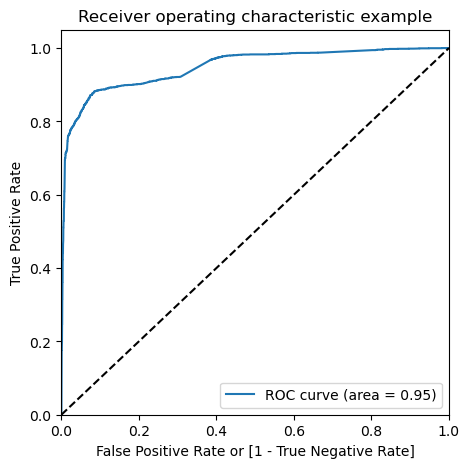

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since ROC curve area is close to 1, this indicates the predictive model is good.

## Finding the Optimal Threshold

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.141471,4715,0,1,1,0,0,0,0,0,0,0,0
1,1,0.991050,7132,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023009,8954,0,1,0,0,0,0,0,0,0,0,0
3,0,0.507229,5283,1,1,1,1,1,1,1,0,0,0,0
4,0,0.181498,3003,0,1,1,0,0,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.740260  0.974235  0.594378
0.2   0.2  0.864719  0.897746  0.844127
0.3   0.3  0.902288  0.878019  0.917420
0.4   0.4  0.903216  0.851852  0.935241
0.5   0.5  0.900897  0.816425  0.953564
0.6   0.6  0.900124  0.783011  0.973143
0.7   0.7  0.897186  0.760064  0.982681
0.8   0.8  0.883117  0.713768  0.988705
0.9   0.9  0.877087  0.694444  0.990964


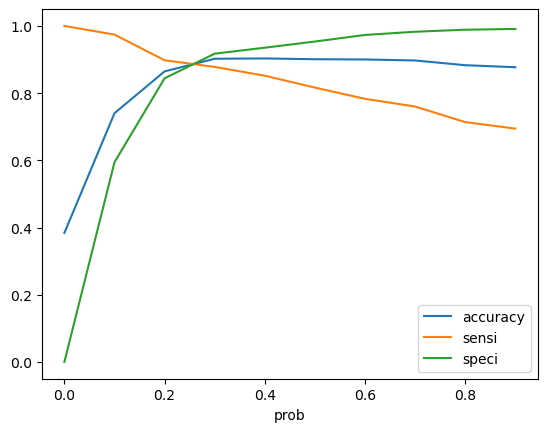

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.141471,4715,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.991050,7132,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023009,8954,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.507229,5283,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.181498,3003,0,1,1,0,0,0,0,0,0,0,0,0


In [89]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.141471,4715,0,14
1,1,0.991050,7132,1,99
2,0,0.023009,8954,0,2
3,0,0.507229,5283,1,51
4,0,0.181498,3003,0,18


In [90]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9022881880024737

In [91]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3655,  329],
       [ 303, 2181]], dtype=int64)

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8780193236714976

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.9174196787148594

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.95, which is very good. We have the following values for the Train Data:

Accuracy : 90.23%
Sensitivity : 81.80%
Specificity : 91.74%

In [95]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.08258032128514056


In [96]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8689243027888446


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9234461849418898


In [98]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3655,  329],
       [ 303, 2181]], dtype=int64)

##### Precision

In [99]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8689243027888446

##### Recall

In [100]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8780193236714976

In [101]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8689243027888446

In [102]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8780193236714976

In [103]:
from sklearn.metrics import precision_recall_curve

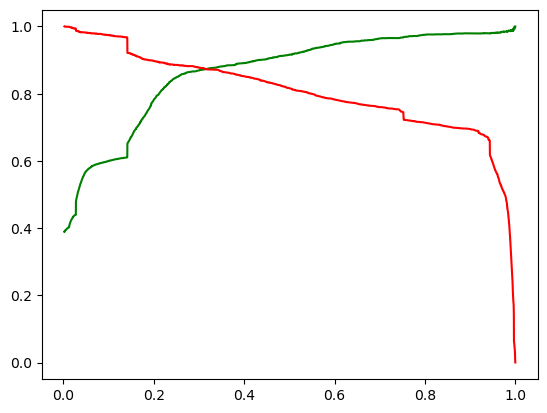

In [104]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [105]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Housewife,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
4608,0.0,0.0,0.069565,0.114182,0.178000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7935,1.0,0.0,0.017391,0.420933,0.133333,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4043,1.0,0.0,0.008696,0.000906,0.066667,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7821,0.0,0.0,0.017391,0.146353,0.133333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,0.0,0.0,0.026087,0.091074,0.200000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Add Form,Busy,Closed by Horizzon,Lost to EINS,Ringing,Will revert after reading the email,invalid number,switched off,Modified
4608,0.114182,0,0,1,0,0,0,0,0,0
7935,0.420933,0,0,0,0,0,0,0,0,1
4043,0.000906,0,0,0,0,0,0,0,0,1
7821,0.146353,0,0,0,0,1,0,0,0,0
856,0.091074,0,0,0,0,0,0,0,0,0


In [107]:
X_test_sm = sm.add_constant(X_test)

## Predictions on Test Set

In [108]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4608    0.992672
7935    0.108245
4043    0.027790
7821    0.021224
856     0.183986
927     0.231857
318     0.994579
1018    0.464379
8151    0.006185
1570    0.981553
dtype: float64

In [109]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [110]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [111]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [112]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4608,0.992672
1,0,7935,0.108245
2,0,4043,0.027790
3,0,7821,0.021224
4,0,856,0.183986


In [114]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4608,0.992672
1,0,7935,0.108245
2,0,4043,0.027790
3,0,7821,0.021224
4,0,856,0.183986


In [115]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [116]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4608,1,0.992672,99
1,7935,0,0.108245,11
2,4043,0,0.027790,3
3,7821,0,0.021224,2
4,856,0,0.183986,18


In [117]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4608,1,0.992672,99,1
1,7935,0,0.108245,11,0
2,4043,0,0.027790,3,0
3,7821,0,0.021224,2,0
4,856,0,0.183986,18,0


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9076479076479076

In [119]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1566,  129],
       [ 127,  950]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8820798514391829

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.9238938053097345

In [123]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8804448563484708

In [124]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8820798514391829

### Observation
After running the model on the Test Data these are the figures we obtain:

Accuracy : 90.76%
Sensitivity : 88.21%
Specificity : 92.39%

### Final Observation

#### 1. Train Data
        Accuracy : 90.23% Sensitivity : 81.80% Specificity : 91.74% 
#### 2. Test Data
        Accuracy : 90.76% Sensitivity : 88.21% Specificity : 92.39%

### Conclusion

#### While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
#### Accuracy, Sensitivity and Specificity values of test set are around 90%, 88% and 92% which are approximately closer to the respective values calculated using trained set.
#### Hence overall this model seems to be good.   